Introducing modules and data processing with graphing

In [ ]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('classic')

In [ ]:
%matplotlib inline

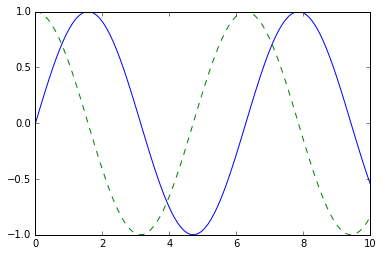

In [ ]:

x = np.linspace(0, 10, 100)

fig = plt.figure()
plt.plot(x, np.sin(x), '-')
plt.plot(x, np.cos(x), '--');

In [ ]:
fig.savefig('my_figure.png')

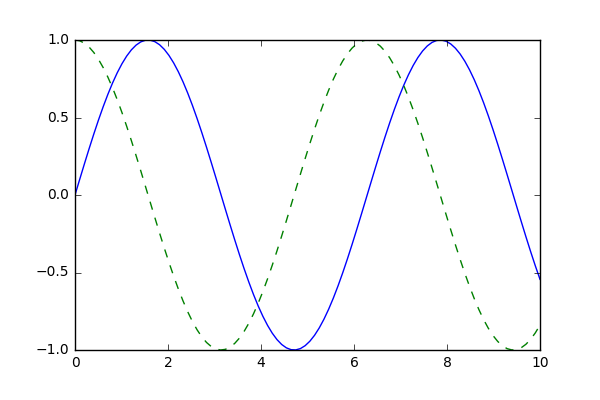

In [ ]:
from IPython.display import Image
Image('my_figure.png')

Pandas processing of data
Using https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(11, 4)})

In [ ]:
btc_usd = pd.read_csv('/home/btc_usb.csv')


In [ ]:
btc_usd.head()

,Date,High,Low,Mid,Last,Bid,Ask,Volume
0,2021-11-16,63561.992029,58625.687342,60192.5,60189.000000,60192.0,60193.0,12996.953559
1,2021-11-15,66343.875554,63351.000000,63724.0,63711.000000,63718.0,63730.0,5227.237959
2,2021-11-14,65311.000000,63564.000000,65148.5,65147.000000,65147.0,65150.0,2062.902609
3,2021-11-13,64988.986282,63405.000000,64512.5,64511.000000,64511.0,64514.0,1851.356843
4,2021-11-12,65421.000000,62255.000000,64027.5,64027.432184,64027.0,64028.0,5086.913300


In [ ]:
btc_usd.Last.agg('mode')

0    447.0
dtype: float64

Now let's load BTC data from https://www.cryptodatadownload.com/data/bitstamp/ then upload to the left in /home

Then now loads each file into a Python Dataframe
The CSV schema is
unix,date,symbol,open,high,low,close,Volume BTC,Volume USD


In [15]:
btc_2017 = pd.read_csv('/home/Bitstamp_BTCUSD_2017_minute.csv', parse_dates=['date'], index_col='date', skiprows=1)
btc_2018 = pd.read_csv('/home/Bitstamp_BTCUSD_2018_minute.csv', parse_dates=['date'], index_col='date', skiprows=1)
btc_2019 = pd.read_csv('/home/Bitstamp_BTCUSD_2019_minute.csv', parse_dates=['date'], index_col='date', skiprows=1)
btc_2020 = pd.read_csv('/home/Bitstamp_BTCUSD_2020_minute.csv', parse_dates=['date'], index_col='date', skiprows=1)
btc_2021 = pd.read_csv('/home/Bitstamp_BTCUSD_2021_minute.csv', parse_dates=['date'], index_col='date', skiprows=1)

In [22]:
btc = pd.concat([btc_2017, btc_2018, btc_2019, btc_2020, btc_2021], axis=0)
btc.info()
btc = btc.drop(['unix','symbol'], axis=1)
btc.head(5)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2525752 entries, 2017-12-31 23:59:00 to 2021-01-01 00:01:00
Data columns (total 8 columns):
 #   Column      Dtype  
---  ------      -----  
 0   unix        int64  
 1   symbol      object 
 2   open        float64
 3   high        float64
 4   low         float64
 5   close       float64
 6   Volume BTC  float64
 7   Volume USD  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 173.4+ MB


,open,high,low,close,Volume BTC,Volume USD
date,,,,,,
2017-12-31 23:59:00,13913.28,13913.28,13867.18,13880.00,0.591748,8213.456549
2017-12-31 23:58:00,13913.26,13953.83,13884.69,13953.77,1.398784,19518.309658
2017-12-31 23:57:00,13908.73,13913.26,13874.99,13913.26,0.775012,10782.944294
2017-12-31 23:56:00,13827.00,13908.69,13827.00,13859.58,0.666459,9236.841134
2017-12-31 23:55:00,13825.05,13825.05,13825.05,13825.05,0.065501,905.560130


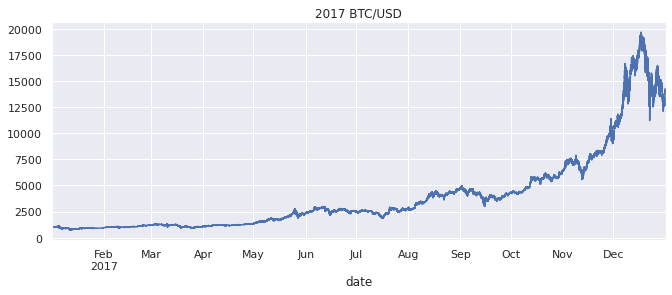

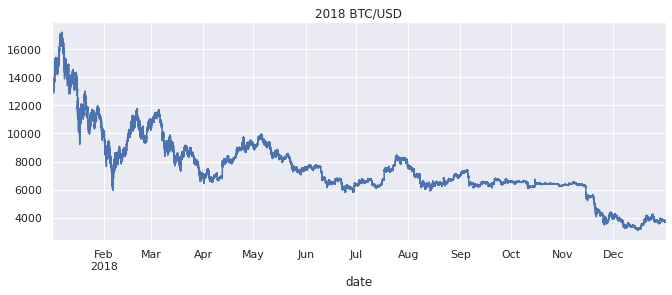

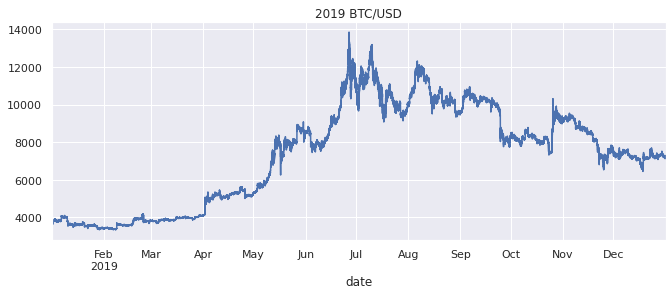

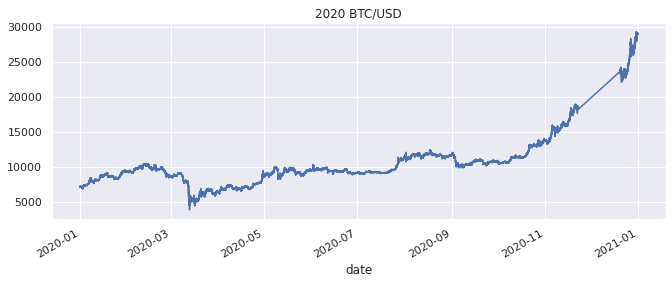

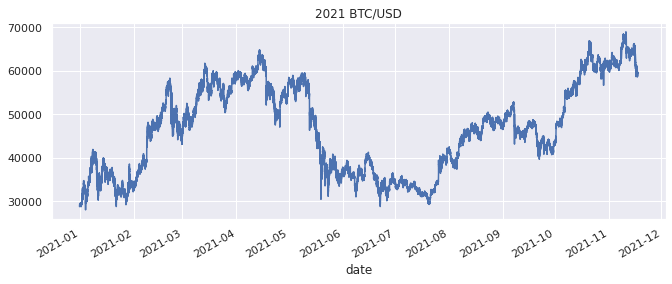

In [33]:
btc.loc['2017','close'].plot(title='2017 BTC/USD')
plt.show()
btc.loc['2018','close'].plot(title='2018 BTC/USD')
plt.show()
btc.loc['2019','close'].plot(title='2019 BTC/USD')
plt.show()
btc.loc['2020','close'].plot(title='2020 BTC/USD')
plt.show()
btc.loc['2021','close'].plot(title='2021 BTC/USD')
plt.show()